In [67]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Import data 

In [138]:
data = pd.read_csv('/Users/giuliaocchini/Downloads/data.tsv', sep='\t')
glottolog_data = pd.read_csv('/Users/giuliaocchini/Downloads/languages_and_dialects_geo.csv')
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/176836227.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


# N of languages per n of speakers

In [159]:
counts = data['Number of speakers (rounded)'].value_counts()
counts

Number of speakers (rounded)
<10K         819
10K-100K     789
200000       243
100000       152
300000       118
            ... 
17000000       1
60000000       1
65000000       1
128000000      1
86000000       1
Name: count, Length: 78, dtype: int64

# Basic manipulation

In [139]:
less_than_10k =  data[data['Number of speakers (rounded)'] == '<10K']
glottocodes = less_than_10k['Glottocode (Glottolog)'].tolist()
df= glottolog_data[glottolog_data['glottocode'].isin(glottocodes)]
df = df.dropna(subset = ['latitude', 'longitude'])
lang_coordinates = df[['name','glottocode','level','latitude', 'longitude']]

# Some datapoints did not merge...which ones?

In [140]:
missing_values = [x for x in glottocodes if x not in glottolog_data['glottocode'].values]
missing_values

['comm1246', 'slav1253', nan, 'haid1248', 'inup1234']

# Fix coordinates

In [141]:
points = lang_coordinates.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
gdb = geopandas.GeoDataFrame(lang_coordinates.assign(geometry=points), \
                        crs={'init' :'epsg:4326'})
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
gdb['x'] = xys['x']
gdb['y'] = xys['y']

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Scatter Plot 

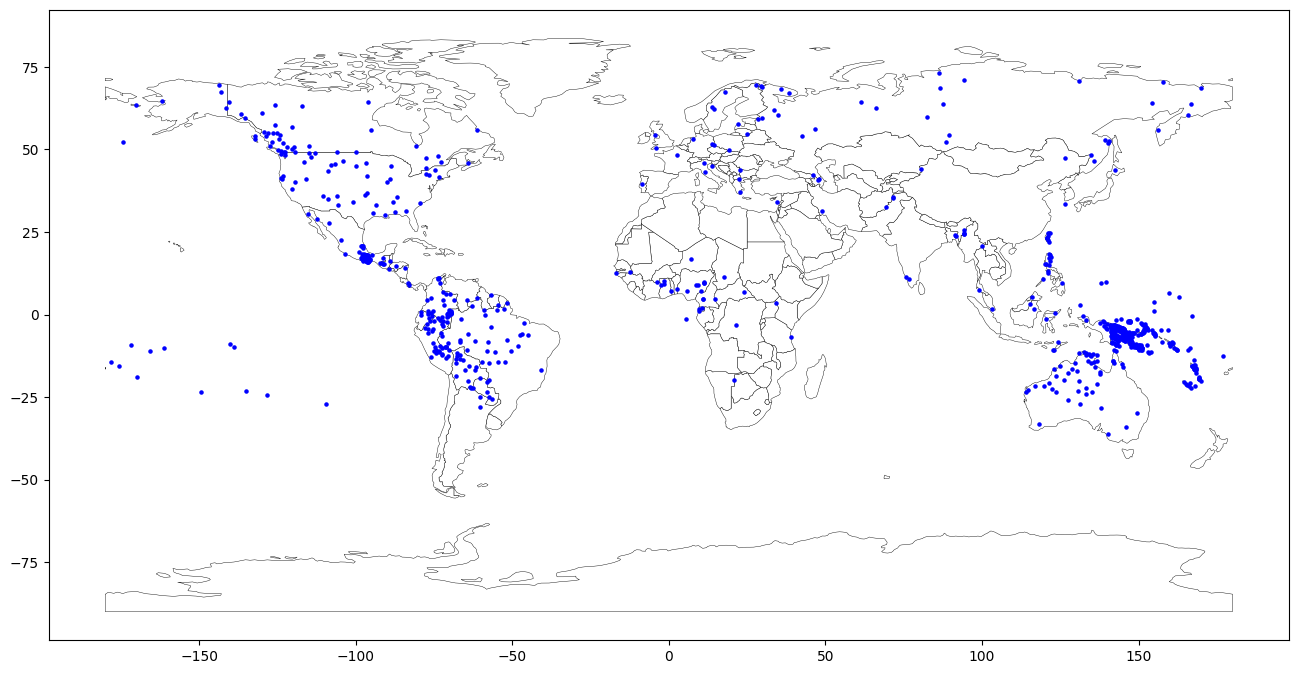

In [142]:
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
gdb.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()

# Get counts for gradient plot 

In [143]:
stats_with_countries = geopandas.sjoin(gdb, worldmap, how="left", predicate="within")
country_counts = stats_with_countries['name_right'].value_counts()
#country_counts = stats_with_countries.groupby('name_right')['geometry'].count()
countries_gdf = worldmap.merge(country_counts, left_on='name', right_index=True, how = 'left')
countries_gdf['count'].fillna(0, inplace=True)

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/3249239178.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  stats_with_countries = geopandas.sjoin(gdb, worldmap, how="left", predicate="within")
/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/3249239178.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object

# Gradient Plot

<Axes: >

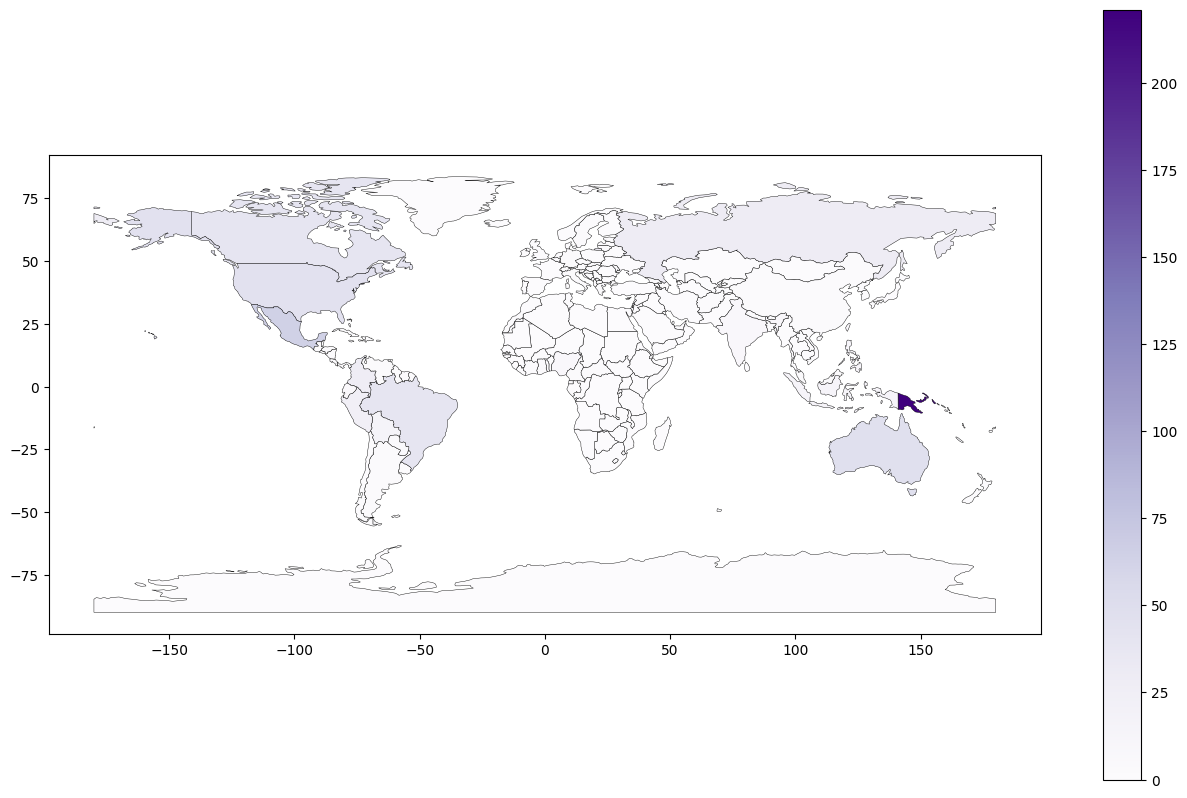

In [144]:
fig, ax = plt.subplots(figsize=(16, 10)) 
countries_gdf.plot(ax = ax, column = 'count',cmap='Purples', legend=True, edgecolor = 'black', linewidth = 0.3)

In [152]:
def location_by_n_of_speakers(data, glottolog_data, number_of_speakers): 
    less_than_n =  data[data['Number of speakers (rounded)'] == number_of_speakers]
    glottocodes = less_than_n['Glottocode (Glottolog)'].tolist()
    df= glottolog_data[glottolog_data['glottocode'].isin(glottocodes)]
    df = df.dropna(subset = ['latitude', 'longitude'])
    lang_coordinates = df[['name','glottocode','level','latitude', 'longitude']]
    points = lang_coordinates.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
    gdb = geopandas.GeoDataFrame(lang_coordinates.assign(geometry=points), \
                            crs={'init' :'epsg:4326'})
    xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
    gdb['x'] = xys['x']
    gdb['y'] = xys['y']
    return gdb

# 10K-100K

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


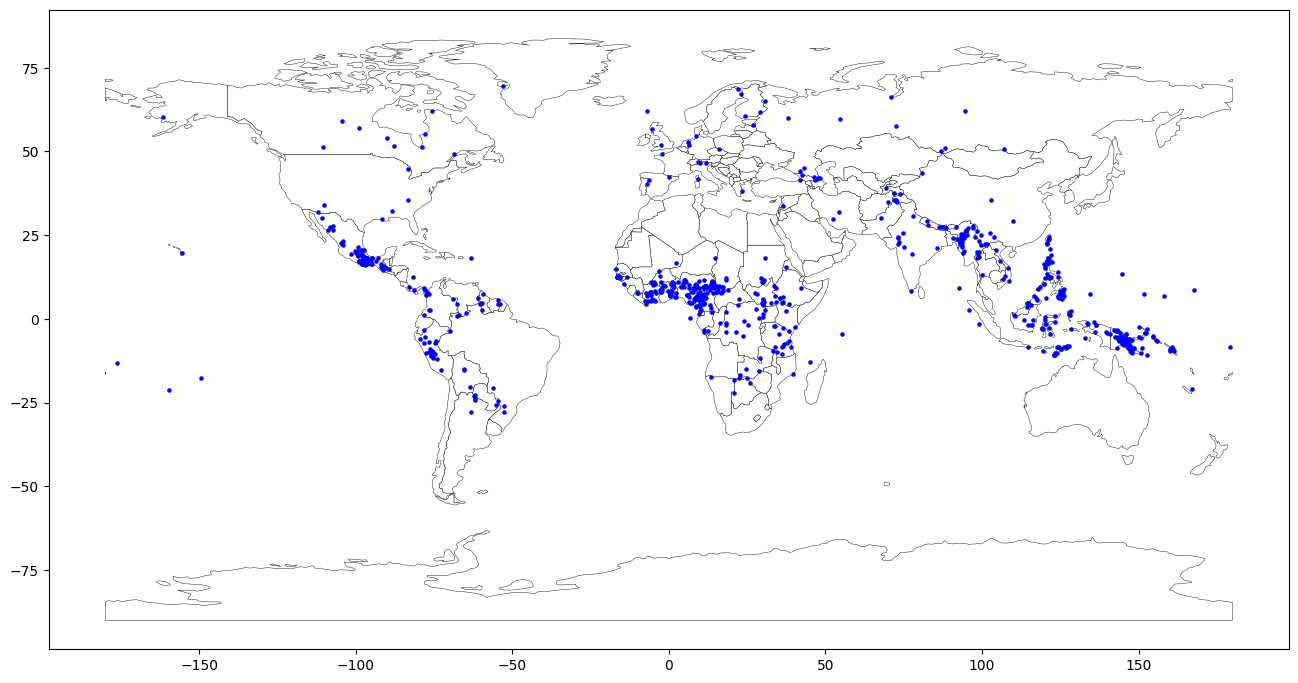

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/396707876.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  stats_with_countries = geopandas.sjoin(hundredk, worldmap, how="left", predicate="within")
/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/396707876.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original ob

<Axes: >

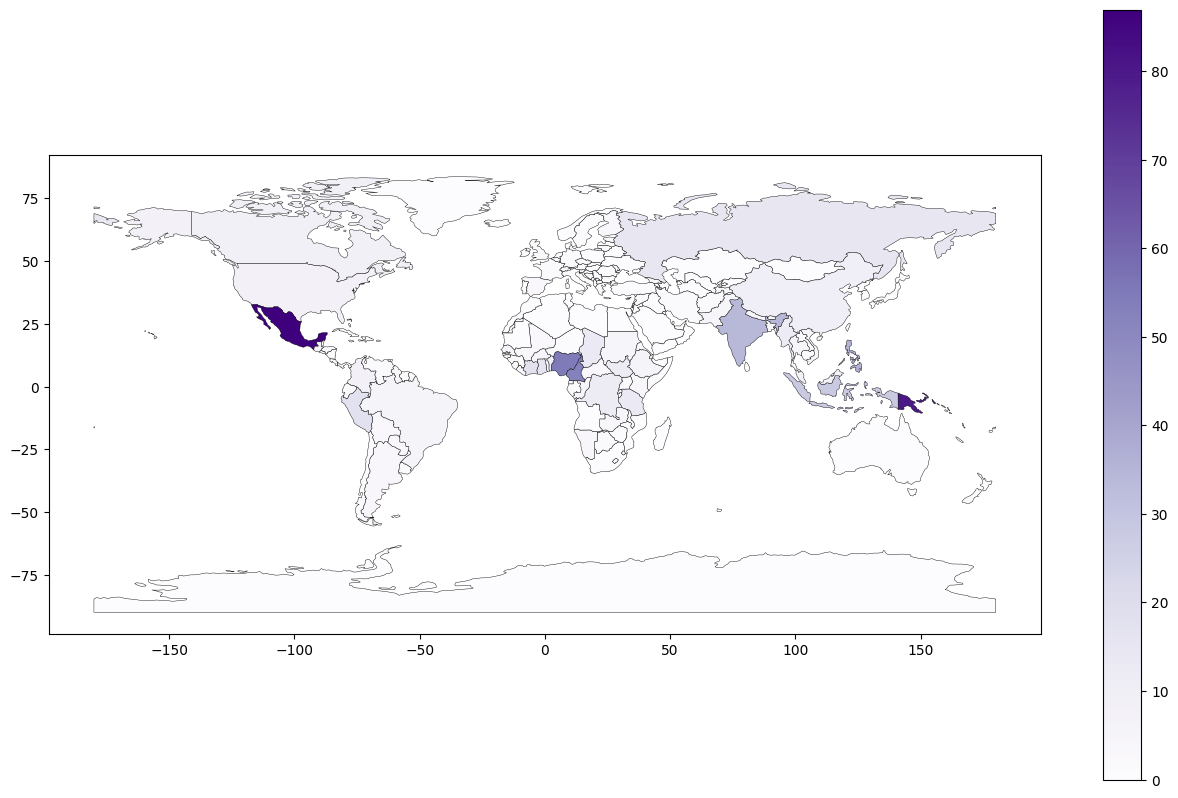

In [156]:
hundredk = location_by_n_of_speakers(data, glottolog_data, '10K-100K')
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
hundredk.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()
stats_with_countries = geopandas.sjoin(hundredk, worldmap, how="left", predicate="within")
country_counts = stats_with_countries['name_right'].value_counts()
#country_counts = stats_with_countries.groupby('name_right')['geometry'].count()
countries_gdf = worldmap.merge(country_counts, left_on='name', right_index=True, how = 'left')
countries_gdf['count'].fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(16, 10)) 
countries_gdf.plot(ax = ax, column = 'count',cmap='Purples', legend=True, edgecolor = 'black', linewidth = 0.3)

# 100K

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


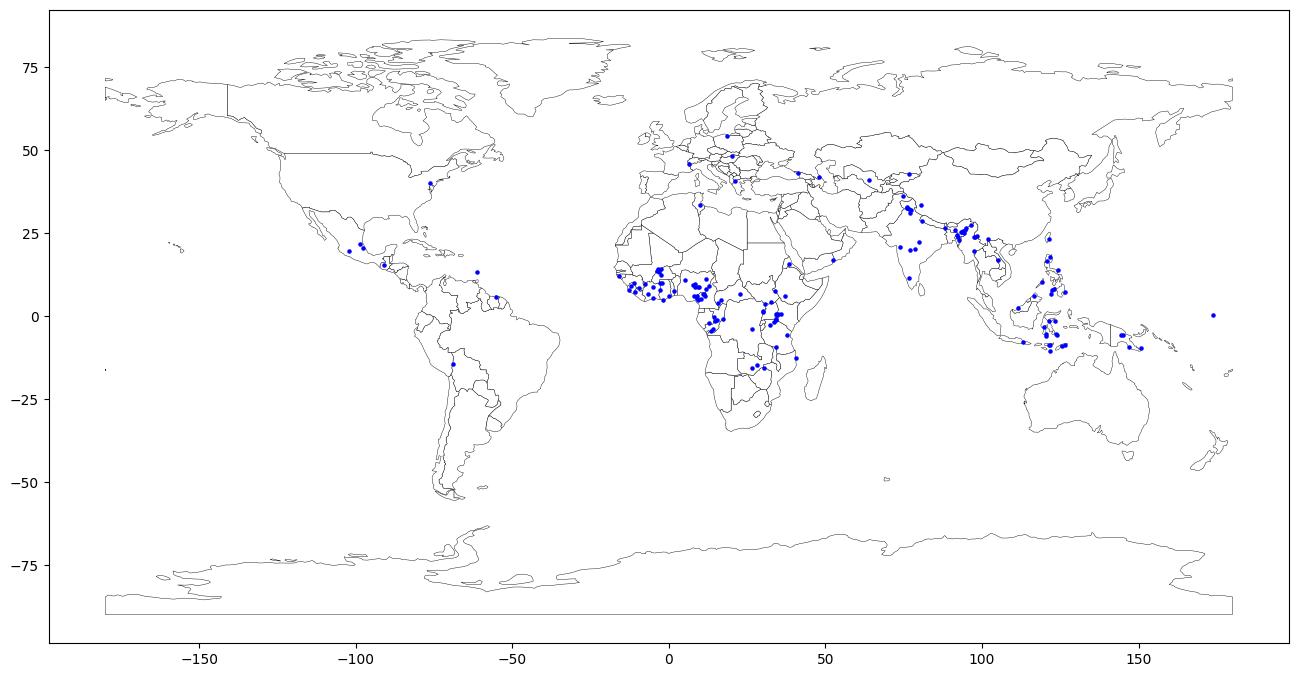

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/2560057050.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  stats_with_countries = geopandas.sjoin(hundredkplus, worldmap, how="left", predicate="within")
/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/2560057050.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

<Axes: >

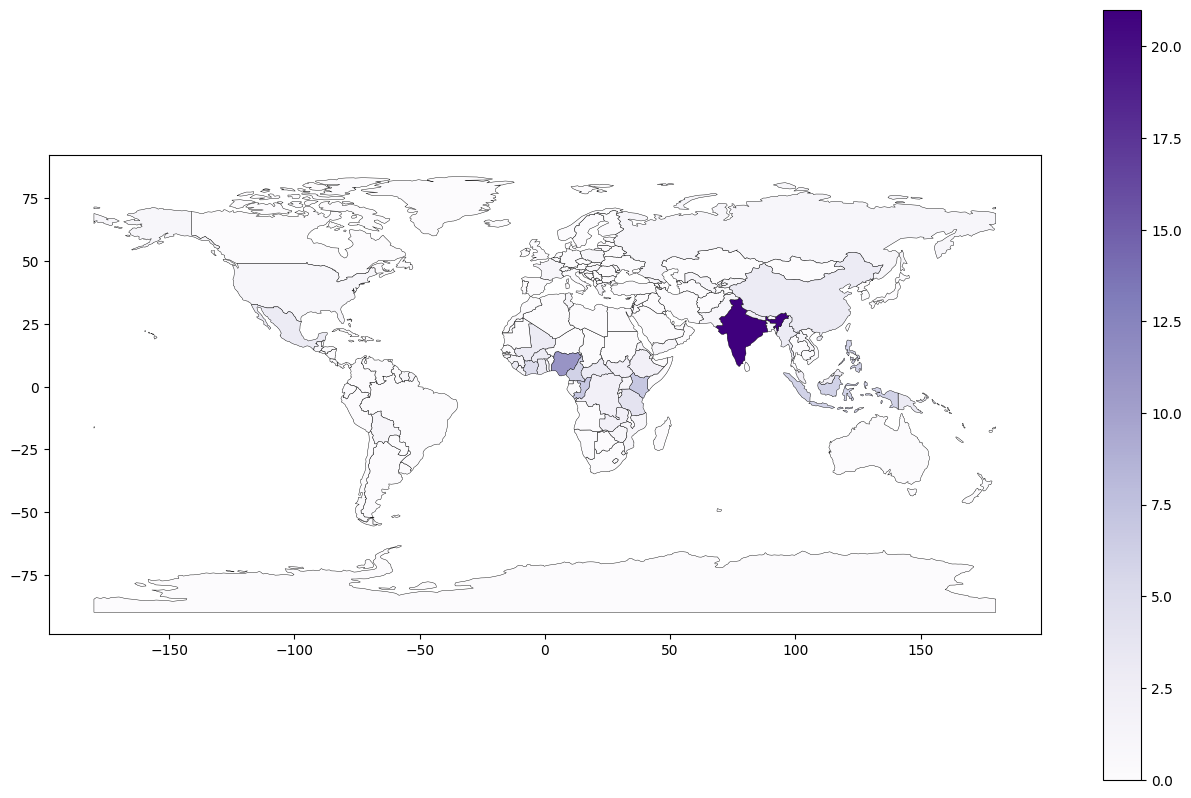

In [158]:
hundredkplus = location_by_n_of_speakers(data, glottolog_data, '100000')
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
hundredkplus.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()
stats_with_countries = geopandas.sjoin(hundredkplus, worldmap, how="left", predicate="within")
country_counts = stats_with_countries['name_right'].value_counts()
#country_counts = stats_with_countries.groupby('name_right')['geometry'].count()
countries_gdf = worldmap.merge(country_counts, left_on='name', right_index=True, how = 'left')
countries_gdf['count'].fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(16, 10)) 
countries_gdf.plot(ax = ax, column = 'count',cmap='Purples', legend=True, edgecolor = 'black', linewidth = 0.3)